# Laptop Price Prediction - Exploratory Data Analysis (EDA)

In this notebook, we will explore the dataset to understand relationships between features and the target variable (`Price_euros`).
We will:
1. Explore numeric features (distributions, correlations)
2. Explore categorical features (company, type, etc.)
3. Visualize feature-target relationships

### Step 0: Setup
Import necessary libraries and load the cleaned dataset from `../data/processed/laptops_clean.csv`.

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots look nicer
sns.set(style="whitegrid")

# Load the cleaned dataset
data = pd.read_csv("../data/processed/laptops_cleaned.csv")

# Quick check
print("Shape:", data.shape)
data.head()

Shape: (1303, 17)


,Company,Product,TypeName,Inches,Ram,OpSys,Weight,Price_euros,SSD,HDD,Hybrid,Flash_Storage,Touchscreen,X_res,Y_res,Cpu_brand,Gpu_brand
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,128,0,0,0,0,2560,1600,Intel,Intel
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,0,0,0,128,0,1440,900,Intel,Intel
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,256,0,0,0,0,1920,1080,Intel,Intel
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,512,0,0,0,0,2880,1800,Intel,AMD
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,256,0,0,0,0,2560,1600,Intel,Intel


### Step 1: Basic Statistics
Check the shape, summary statistics, and missing values.

In [30]:
print("Shape of dataset:", data.shape)
print("\nMissing values:\n", data.isnull().sum())
data.describe()

Shape of dataset: (1303, 17)

Missing values:
 Company          0
Product          0
TypeName         0
Inches           0
Ram              0
OpSys            0
Weight           0
Price_euros      0
SSD              0
HDD              0
Hybrid           0
Flash_Storage    0
Touchscreen      0
X_res            0
Y_res            0
Cpu_brand        0
Gpu_brand        0
dtype: int64


,Inches,Ram,Weight,Price_euros,SSD,HDD,Hybrid,Flash_Storage,Touchscreen,X_res,Y_res
count,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000
mean,15.017191,8.382195,2.038734,1123.686992,184.027629,422.477360,9.034536,4.555641,0.147352,1768.193400,1070.830391
std,1.426304,5.084665,0.665475,699.009043,188.268689,528.006298,94.738890,30.274090,0.354593,470.888913,284.519410
min,10.100000,2.000000,0.690000,174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,768.000000
25%,14.000000,4.000000,1.500000,599.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1366.000000,900.000000
50%,15.600000,8.000000,2.040000,977.000000,256.000000,0.000000,0.000000,0.000000,0.000000,1920.000000,1080.000000
75%,15.600000,8.000000,2.300000,1487.880000,256.000000,1024.000000,0.000000,0.000000,0.000000,1920.000000,1080.000000
max,18.400000,64.000000,4.700000,6099.000000,1024.000000,2048.000000,1024.000000,512.000000,1.000000,3200.000000,2160.000000


### Step 2: Distribution of Price
Visualize the distribution of the target variable to see its spread.

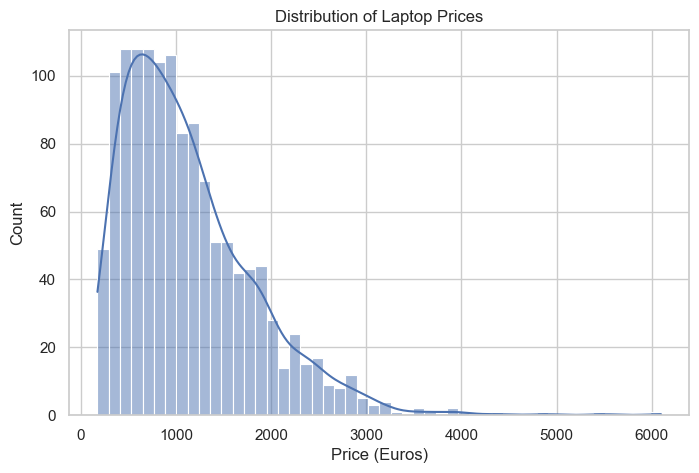

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(data['Price_euros'], bins=50, kde=True)
plt.title("Distribution of Laptop Prices")
plt.xlabel("Price (Euros)")
plt.ylabel("Count")
plt.show()

### Step 3: Correlation Heatmap
Check correlations among numeric features and price.

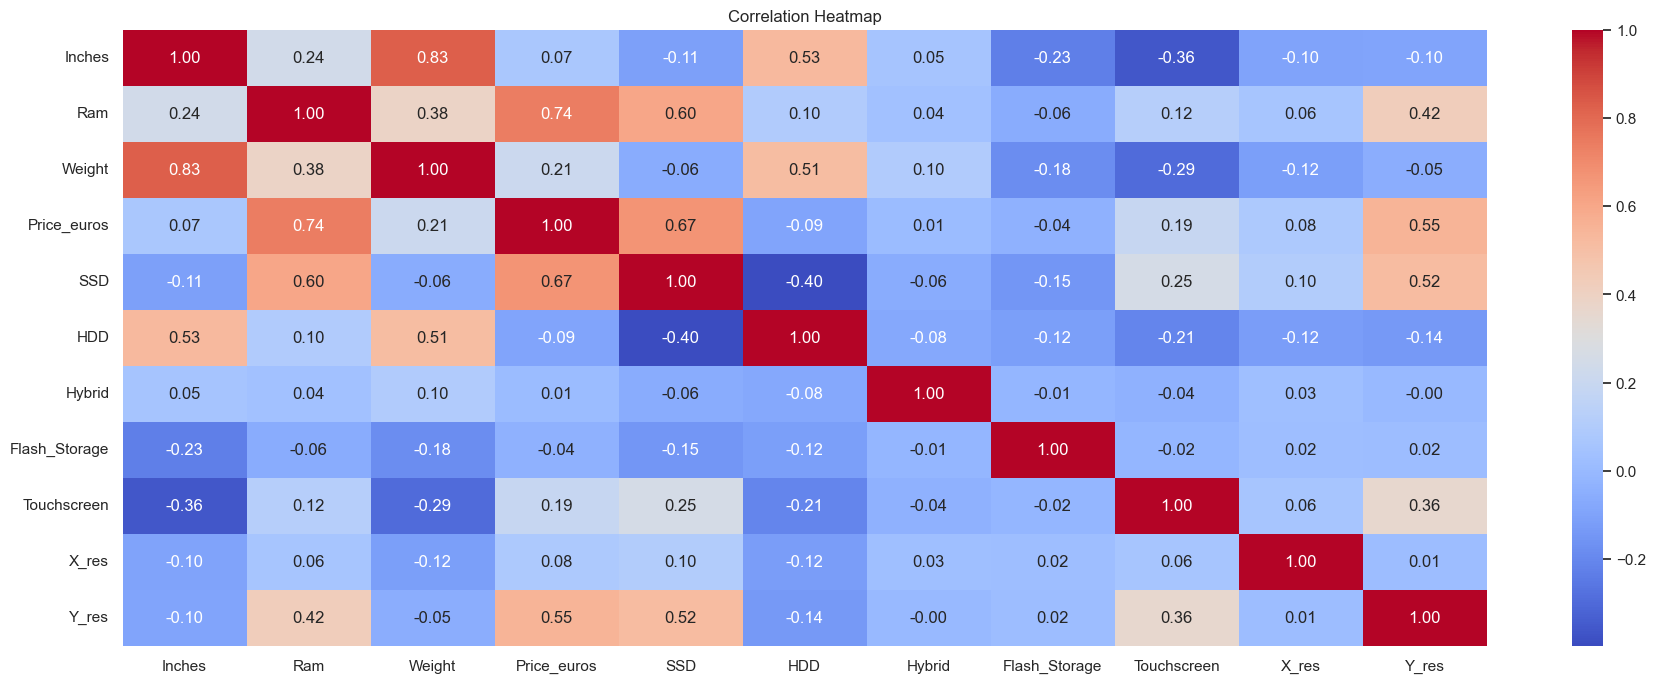

<Figure size 640x480 with 0 Axes>

In [32]:
plt.figure(figsize=(22,8))
sns.heatmap(data.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()
plt.savefig("../reports/figures/correlation_heatmap.png")

### Step 4: Price vs Company
Check how average laptop price varies by company.

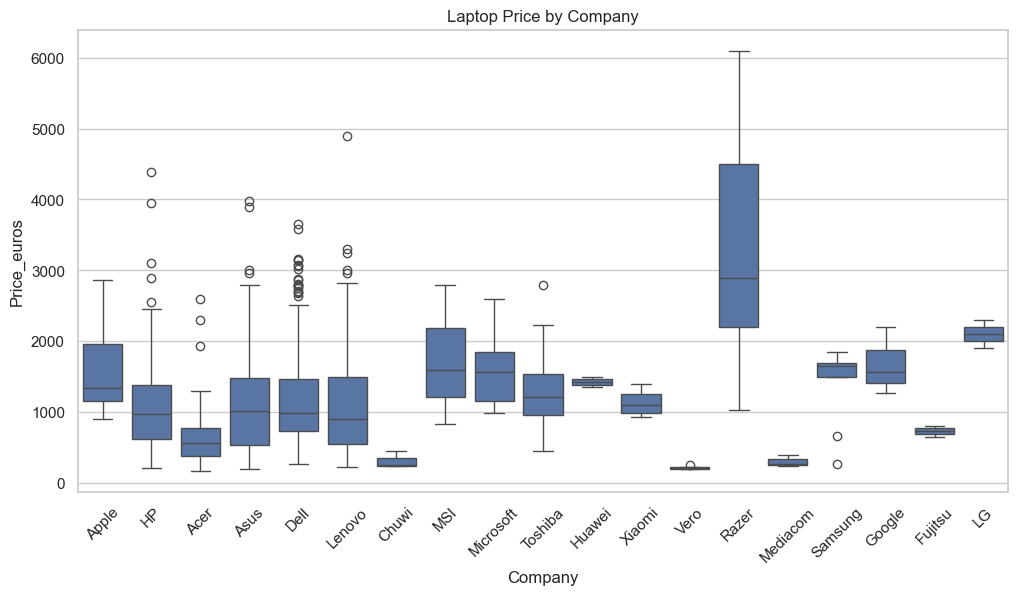

<Figure size 640x480 with 0 Axes>

In [33]:
plt.figure(figsize=(12,6))
sns.boxplot(x="Company", y="Price_euros", data=data)
plt.xticks(rotation=45)
plt.title("Laptop Price by Company")
plt.show()
plt.savefig("../reports/figures/price_by_company.png")

### Step 5: Price vs Laptop Type
Check how average price varies by type (e.g., Ultrabook, Gaming).

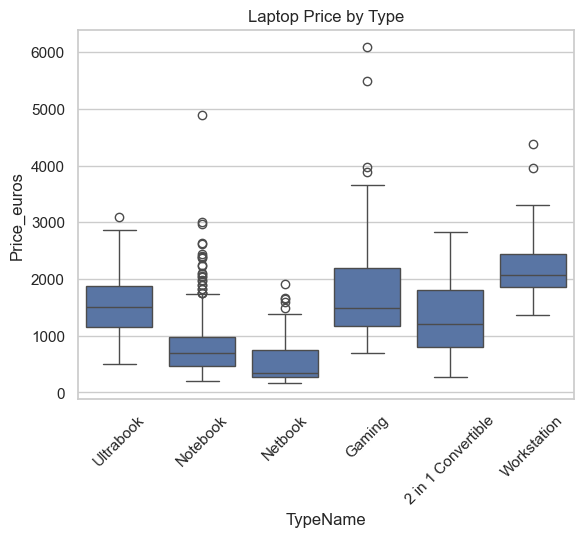

<Figure size 640x480 with 0 Axes>

In [34]:
eda = pd.read_csv("../data/raw/laptop_price.csv", encoding="ISO-8859-1")
sns.boxplot(x="TypeName", y="Price_euros", data=eda)
plt.xticks(rotation=45)
plt.title("Laptop Price by Type")
plt.show()
plt.savefig("../reports/figures/price_by_type.png")

### Step 6: Price vs RAM
Check how price changes with RAM size.

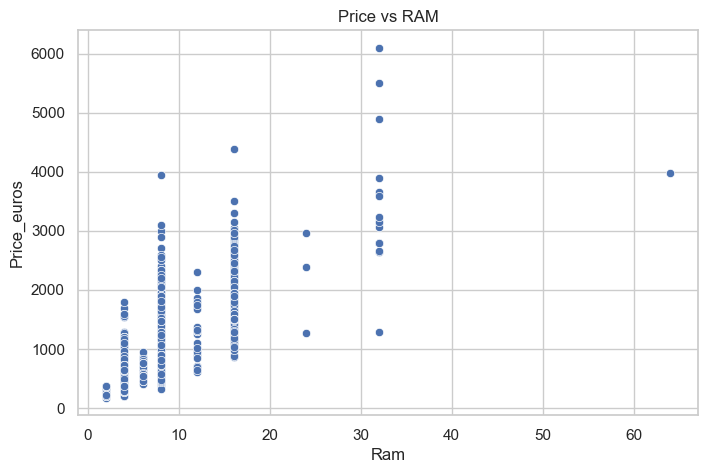

<Figure size 640x480 with 0 Axes>

In [35]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="Ram", y="Price_euros", data=data)
plt.title("Price vs RAM")
plt.show()
plt.savefig("../reports/figures/price_by_ram.png")

### Step 7: Price vs Weight
Check if lighter laptops tend to cost more.

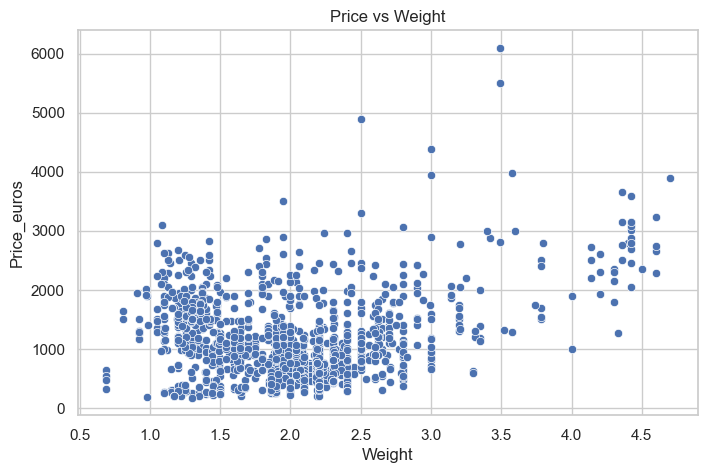

<Figure size 640x480 with 0 Axes>

In [36]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="Weight", y="Price_euros", data=data)
plt.title("Price vs Weight")
plt.show()
plt.savefig("../reports/figures/price_by_weight.png")

### Step 8: Save EDA Figures (Optional)
We can save plots for reports/presentation.

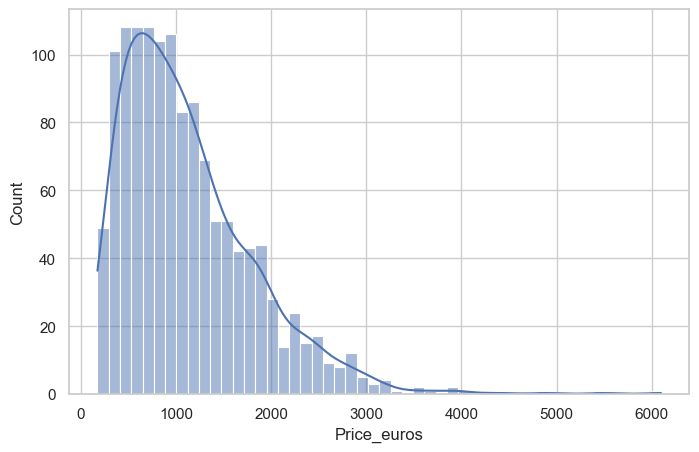

In [37]:
plt.figure(figsize=(8,5))
sns.histplot(data["Price_euros"], bins=50, kde=True)
plt.savefig("../reports/figures/price_distribution.png")